In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.2.0-bin-hadoop3.2"

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [5]:
path = '/content/drive/MyDrive/H516/US_Accidents.csv'

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr, mean
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df= spark.read.csv(path, header=True, inferSchema=True)

In [ ]:
df.show()

+---------+-------+--------+--------------+--------------+---------+----------+----------+------------+------------+--------------------+--------------------+----------------+----------+-----+----------+-------+-----------+------------+-----------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-------+--------+--------+--------+-------+-------+----------+-------+-------+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|       ID| Source|Severity|    Start_Time|      End_Time|Start_Lat| Start_Lng|   End_Lat|     End_Lng|Distance(mi)|         Description|              Street|            City|    County|State|   Zipcode|Country|   Timezone|Airport_Code|Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|   Bump|Cro

In [ ]:
print(df.columns)

['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [24]:
from pyspark.sql import functions as F

# Create a DataFrame of Street and their corresponding accident cases
street_df = df.groupBy("Street").count().withColumnRenamed("count", "Cases").orderBy(F.col("Cases").desc())
top_ten_streets_df = street_df.limit(10).toPandas()


In [25]:
# Display the top 10 accident-prone streets
print(top_ten_streets_df)



    Street  Cases
0   I-95 N  78430
1   I-95 S  74528
2    I-5 N  71968
3   I-10 E  55572
4   I-10 W  53725
5    I-5 S  51781
6   I-80 W  39662
7   I-80 E  36113
8  I-405 N  32364
9   I-75 N  28166


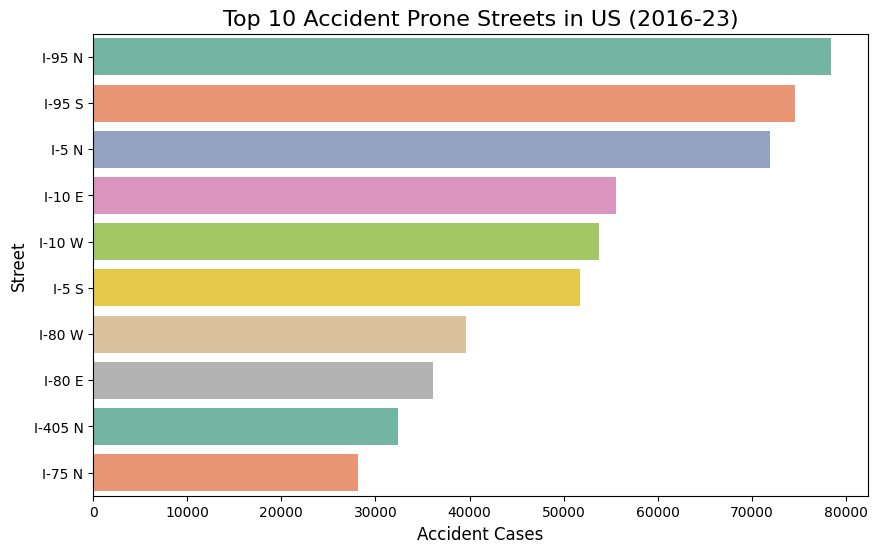

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cases', y='Street', data=top_ten_streets_df, palette='Set2')
plt.title('Top 10 Accident Prone Streets in US (2016-23)', fontsize=16)
plt.xlabel('Accident Cases', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.show()


In [28]:
# Columns to drop
columns_to_drop = ['ID', 'Country', 'Source', 'End_Lat', 'End_Lng', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df = df.drop(*columns_to_drop)

In [ ]:
df.show(5)

+--------+--------------+--------------+---------+----------+------------+--------------------+--------+--------------+---------+-----+----------+-----------+------------+-----------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-------+--------+--------+--------+-------+-------+----------+-------+-------+---------------+--------------+------------+--------------+
|Severity|    Start_Time|      End_Time|Start_Lat| Start_Lng|Distance(mi)|         Description|  Street|          City|   County|State|   Zipcode|   Timezone|Airport_Code|Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|   Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|   Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|
+--------+--------------+--------------+---------+--------

In [ ]:
! pip install seaborn
import matplotlib.cm as cm
import matplotlib
import matplotlib.patches as mpatches

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

In [30]:

from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Assuming 'spark' is your SparkSession and 'df' is your DataFrame

# Define a Window specification over the 'State' column
window_spec = Window.partitionBy('State')

# Calculate the mode (most frequent city) for each 'State' group
mode_cities = F.first(F.col('City')).over(window_spec)

# Fill missing 'City' values with the mode for their respective 'State' group
df = df.withColumn('City', F.when(F.col('City').isNull(), mode_cities).otherwise(F.col('City')))

# Show the DataFrame with updated 'City' column
df.show()


+--------+-------------------+-------------------+------------------+-------------------+------------------+--------------------+--------------------+----------------+--------+-----+-------+-----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+
|Severity|         Start_Time|           End_Time|         Start_Lat|          Start_Lng|      Distance(mi)|         Description|              Street|            City|  County|State|Zipcode|   Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Tur

In [14]:
# List of columns to fill missing values
columns_to_fill = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Iterate through columns and fill missing values with the mean for their respective 'State' group
for column in columns_to_fill:
    # Calculate the mean for each 'State' group
    state_mean_column = F.mean(column).over(Window.partitionBy('State'))

    # Replace missing values with the mean for their respective 'State' group
    df = df.withColumn(column, F.when(F.col(column).isNull(), state_mean_column).otherwise(F.col(column)))



In [ ]:
from pyspark.sql.functions import col



# Group by 'State' and count the occurrences
state_counts = df.groupBy('State').count()

# Rename columns
state_counts = state_counts.withColumnRenamed('State', 'state_code').withColumnRenamed('count', 'cases')

# Order by count in descending order
state_counts = state_counts.orderBy('cases', ascending=False)

# Convert to Pandas DataFrame for plotting
states_pandas = state_counts.limit(10).toPandas()


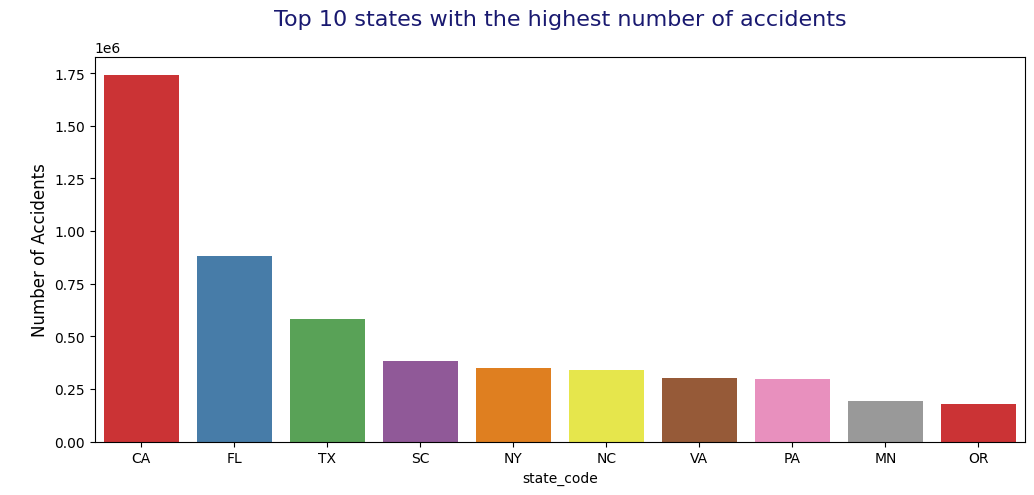

In [32]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='state_code', y='cases', data=states_pandas, palette='Set1')
plt.title("Top 10 states with the highest number of accidents\n", fontdict={'fontsize': 16, 'color': 'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict={'fontsize': 12, 'color': 'black'})
plt.show()

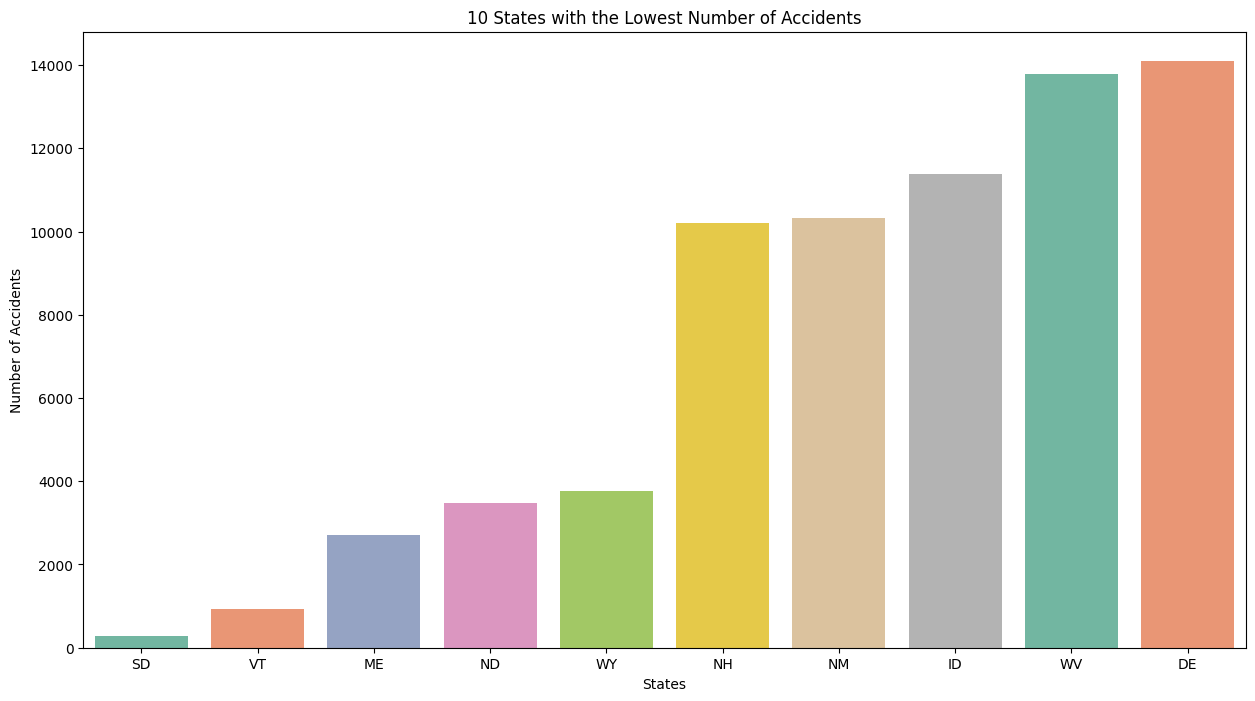

In [33]:

# Group by 'State' and count the occurrences
state_counts = df.groupBy('State').count()

# Order by count in ascending order
state_counts = state_counts.orderBy('count')

# Limit to the bottom 10 states
bottom_10_states = state_counts.limit(10)

# Convert to Pandas DataFrame for plotting
bottom_10_states_pandas = bottom_10_states.toPandas()

# Plot the bar chart
fig, axs = plt.subplots(figsize=(15, 8))
sns.barplot(x='State', y='count', data=bottom_10_states_pandas, palette='Set2')
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("10 States with the Lowest Number of Accidents")
plt.savefig("10 States with the Lowest Number of Accidents.png")
plt.show()


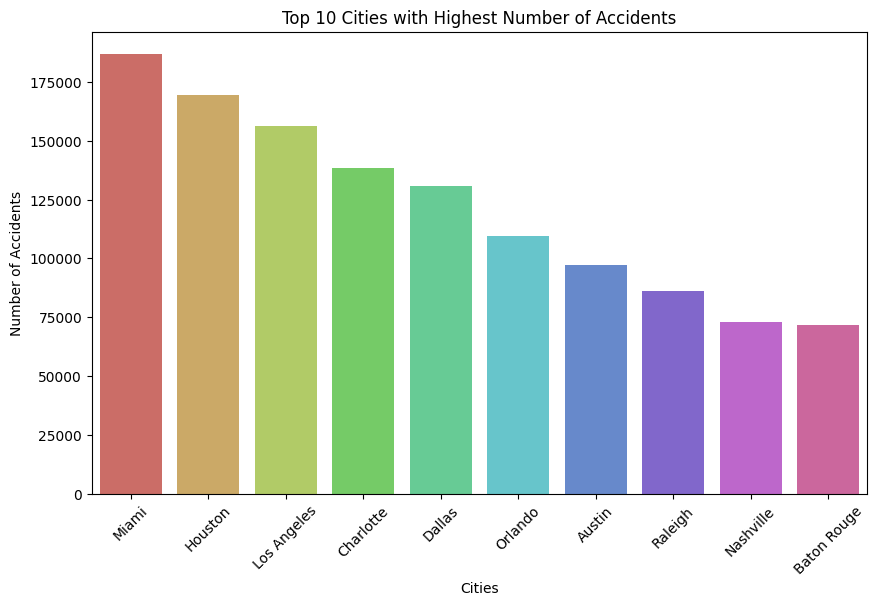

In [34]:

# Group by 'City' and count the occurrences
city_acc_counts = df.groupBy('City').count()

# Order by count in descending order
city_acc_counts = city_acc_counts.orderBy(col('count').desc())

# Limit to the top 10 cities
top_10_cities = city_acc_counts.limit(10)

# Convert to Pandas DataFrame for plotting
top_10_cities_pandas = top_10_cities.toPandas()

# Plot the bar chart
fig, axs = plt.subplots(figsize=(10, 6))
sns.barplot(x='City', y='count', data=top_10_cities_pandas, palette='hls')
axs.tick_params(axis='x', rotation=45)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("Cities")
plt.title("Top 10 Cities with Highest Number of Accidents")
plt.show()


In [35]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import when

# Specify the columns to be updated
columns_to_update = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                      'Railway', 'Roundabout', 'Station', 'Stop']

# Map 'FALSE' to 0 and 'TRUE' to 1 for the specified columns
for col in columns_to_update:
    df = df.withColumn(col, when(df[col] == 'TRUE', 1).otherwise(0))


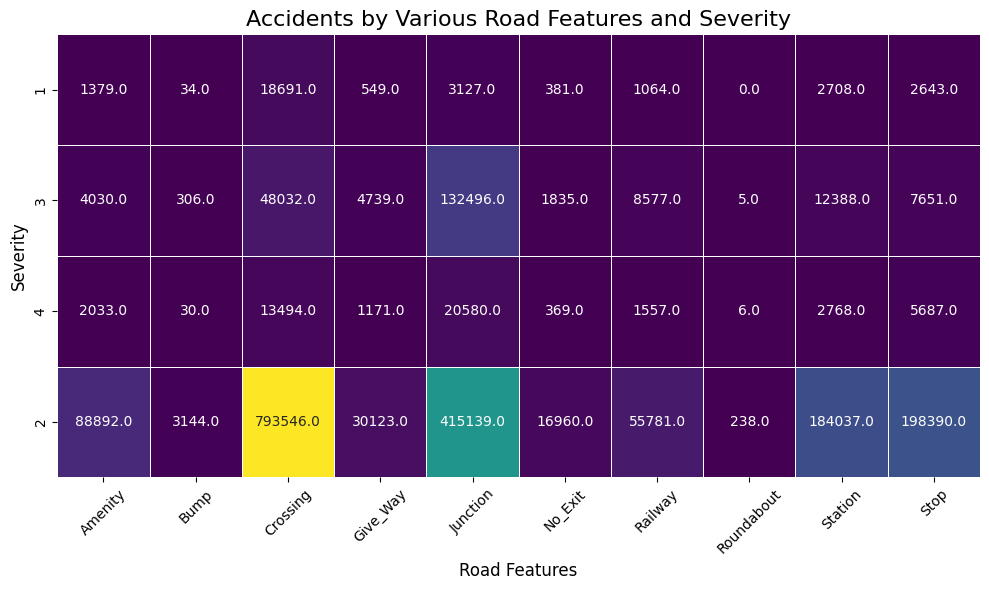

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Assuming 'random_sample' is your PySpark DataFrame
bool_severity_dataset = df.select(
    'Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
    'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
)

# Calculate the number of accidents for each combination of severity and boolean columns
accidents_by_bool_severity = (
    bool_severity_dataset.groupBy('Severity')
    .agg(
        F.sum('Amenity').alias('Amenity'),
        F.sum('Bump').alias('Bump'),
        F.sum('Crossing').alias('Crossing'),
        F.sum('Give_Way').alias('Give_Way'),
        F.sum('Junction').alias('Junction'),
        F.sum('No_Exit').alias('No_Exit'),
        F.sum('Railway').alias('Railway'),
        F.sum('Roundabout').alias('Roundabout'),
        F.sum('Station').alias('Station'),
        F.sum('Stop').alias('Stop')
    )
)

# Convert the PySpark DataFrame to a Pandas DataFrame
accidents_pandas = accidents_by_bool_severity.toPandas()

# Create a heatmap using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(data=accidents_pandas.set_index('Severity'), cmap='viridis', annot=True, fmt='.1f', linewidths=.5, cbar=False)
plt.title('Accidents by Various Road Features and Severity', fontsize=16)
plt.xlabel('Road Features', fontsize=12)
plt.ylabel('Severity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Accidents by Various Road Features and Severity.png")
plt.show()


In [ ]:
!pip install folium

In [7]:

from pyspark.sql.functions import mean
import folium
from folium.plugins import HeatMap

# Load the CSV file into a PySpark DataFrame
df = spark.read.csv("/content/drive/MyDrive/H516/US_Accidents.csv", header=True, inferSchema=True)

# Sample data to reduce computation (comment this line if you want to use the entire dataset)
df = df.sample(fraction=0.01, seed=42)

# Calculate the mean values for Start_Lat and Start_Lng
mean_lat_lng = df.agg(mean("Start_Lat").alias("mean_lat"), mean("Start_Lng").alias("mean_lng")).collect()[0]

# Create a folium map centered at the mean location
m = folium.Map(location=[mean_lat_lng["mean_lat"], mean_lat_lng["mean_lng"]], zoom_start=4.4)

# Convert your data to a list of coordinates
heatmap_data = df.select("Start_Lat", "Start_Lng").rdd.map(lambda row: [row.Start_Lat, row.Start_Lng]).collect()

# Create a HeatMap layer and add it to the folium map
HeatMap(heatmap_data).add_to(m)

# Save the folium map as an HTML file or display it in Jupyter Notebook
m.save("accident_heatmap.html")


In [8]:
m